**Classifying, if an image contains a specific image**
* An object of either pizza or steak

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-10-24 14:17:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.223.251, 142.250.75.251, 172.217.20.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.223.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip'

     0K .......... .......... .......... .......... ..........  0%  175K 10m11s
    50K .......... .......... .......... .......... ..........  0%  225K 9m3s
   100K .......... .......... .......... .......... ..........  0%  478K 7m16s
   150K .......... .......... .......... .......... ..........  0%  649K 6m8s
   200K .......... .......... .......... .......... ..........  0%  777K 5m22s
   250K .......... .......... .......... .......... ..........  0% 1.11M 4m44s
   300K .......... .......... .......... .......... ..........  0% 1.11M 4m17s
   350K .......... ..

In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
import os

# Get the file paths lk('pizza_steak'):
for dirnames,  filenames, dirpath in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} image(s) in '{dirpath}'. ")


There are 11 directories and 2 image(s) in '[]'. 
There are 16 directories and 2 image(s) in '[]'. 
There are 22 directories and 0 image(s) in '['1001116.jpg', '1032754.jpg', '103708.jpg', '1060407.jpg', '106507.jpg', '1067986.jpg', '1106738.jpg', '1119571.jpg', '11297.jpg', '1152100.jpg', '1179703.jpg', '1180001.jpg', '1180273.jpg', '1183595.jpg', '1202689.jpg', '121960.jpg', '1220156.jpg', '1223284.jpg', '1226346.jpg', '1228171.jpg', '124815.jpg', '1265335.jpg', '1275885.jpg', '1280320.jpg', '129666.jpg', '1315645.jpg', '1342321.jpg', '1380247.jpg', '138961.jpg', '1398213.jpg', '139952.jpg', '139987.jpg', '140016.jpg', '1412011.jpg', '1445608.jpg', '144631.jpg', '1459760.jpg', '1475479.jpg', '1484836.jpg', '148765.jpg', '1503858.jpg', '1506213.jpg', '1507019.jpg', '1512557.jpg', '153195.jpg', '1555015.jpg', '1594097.jpg', '1618659.jpg', '1636919.jpg', '1655630.jpg', '1686938.jpg', '1687143.jpg', '1691503.jpg', '1694874.jpg', '1765727.jpg', '177513.jpg', '1843754.jpg', '1895182.jpg', 

In [8]:
num_pizza_train = len(os.listdir('pizza_steak/train/pizza'))
num_steak_train = len(os.listdir('pizza_steak/train/steak'))

num_pizza_train, num_steak_train

(750, 750)

In [10]:
import pathlib

dir_names = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in dir_names.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [11]:
# visualize the images
import matplotlib.image as mpimg
import random

In [34]:
def view_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # picking a random image path
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)

    # read_image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"image shape:{img.shape}")
    return img

['175626.jpg']
image shape:(512, 382, 3)


array([[[253, 241, 133],
        [252, 240, 132],
        [250, 237, 132],
        ...,
        [248, 229, 152],
        [249, 230, 151],
        [249, 230, 151]],

       [[253, 241, 133],
        [252, 240, 132],
        [250, 237, 132],
        ...,
        [249, 230, 153],
        [249, 230, 153],
        [250, 231, 152]],

       [[252, 239, 134],
        [252, 239, 134],
        [251, 238, 134],
        ...,
        [252, 230, 155],
        [252, 230, 154],
        [253, 231, 155]],

       ...,

       [[213, 160,  66],
        [219, 166,  72],
        [221, 170,  78],
        ...,
        [251, 249, 192],
        [253, 248, 192],
        [252, 247, 191]],

       [[216, 166,  71],
        [218, 168,  73],
        [224, 174,  79],
        ...,
        [253, 251, 194],
        [252, 250, 193],
        [252, 250, 191]],

       [[219, 169,  74],
        [216, 166,  71],
        [223, 173,  78],
        ...,
        [249, 247, 190],
        [248, 246, 187],
        [247, 245, 186]]

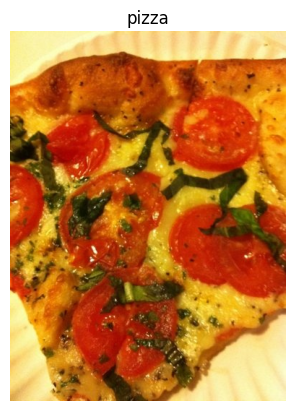

In [35]:
img = view_image("pizza_steak/train/", "pizza")
img

* Going to perform Feature Scaling and
  * load the image
  * preprocess the image 
* Build a cnn architecture for the data
  * define the model
  * compile it
  * fit the model   

In [43]:
# load the data
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
tf.random.set_seed(42)

train_gen = ImageDataGenerator(rescale=1./225.0)
test_gen = ImageDataGenerator(rescale=1./225.0)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_dir_gen = train_gen.flow_from_directory(train_dir,
                                              target_size=(224,224,3),
                                              batch_size=32,
                                              class_mode = 'binary',
                                              seed = 42
                                              )

test_dir_gen = train_gen.flow_from_directory(test_dir,
                                              target_size=(224,224,3),
                                              batch_size=32,
                                              class_mode='binary',
                                              seed = 42
                                              )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
